### Import Packages

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import time
from autograd import numpy as anp
from autograd import grad

### Problem 1

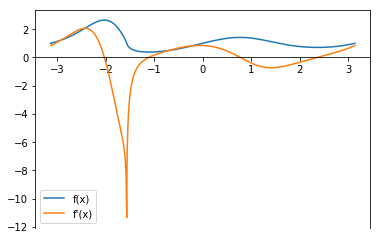

In [2]:
def f(x):
    return (np.sin(x)+1)**(np.sin(np.cos(x)))
def f_prime(X):
    def inner():
        x = sp.symbols('x')
        f = (sp.sin(x)+1) ** (sp.sin(sp.cos(x)))
        f_prime = sp.diff(f, x)
        return sp.lambdify(x, f_prime)
    return inner()(X)
x = np.linspace(-np.pi,np.pi,1000)
ax = plt.gca()
ax.spines['bottom'].set_position("zero")
ax.plot(x,f(x),label='f(x)')
ax.plot(x,f_prime(x),label='f\'(x)')
ax.legend()

### Problem 2

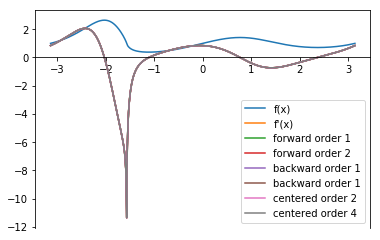

In [3]:
def forward1(x,h=1e-5):
    return (f(x+h)-f(x))/h
def forward2(x,h=1e-5):
    return (4*f(x+h)-3*f(x)-f(x+2*h))/(2*h)
def backward1(x,h=1e-5):
    return (f(x)-f(x-h))/h
def backward2(x,h=1e-5):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)
def centered2(x,h=1e-5):
    return (f(x+h)-f(x-h))/(2*h)
def centered4(x,h=1e-5):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
ax2 = plt.gca()
ax2.spines['bottom'].set_position("zero")
ax2.plot(x,f(x),label='f(x)')
ax2.plot(x,f_prime(x),label='f\'(x)')
ax2.plot(x,forward1(x),label='forward order 1')
ax2.plot(x,forward2(x),label='forward order 2')
ax2.plot(x,backward1(x),label='backward order 1')
ax2.plot(x,backward2(x),label='backward order 1')
ax2.plot(x,centered2(x),label='centered order 2')
ax2.plot(x,centered4(x),label='centered order 4')
ax2.legend()

### Problem 3

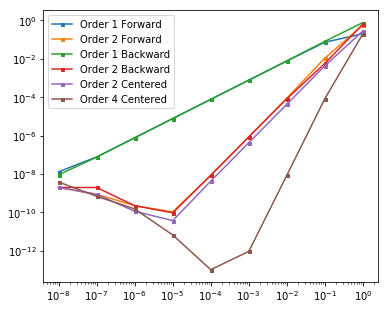

In [4]:
h = np.logspace(-8,0,9)
ax3 = plt.figure(figsize=(6,5)).gca()
ax3.loglog(h,np.abs(forward1(1,h)-f_prime(1)),label='Order 1 Forward',marker='s',ms=3)
ax3.loglog(h,np.abs(forward2(1,h)-f_prime(1)),label='Order 2 Forward',marker='s',ms=3)
ax3.loglog(h,np.abs(backward1(1,h)-f_prime(1)),label='Order 1 Backward',marker='s',ms=3)
ax3.loglog(h,np.abs(backward2(1,h)-f_prime(1)),label='Order 2 Backward',marker='s',ms=3)
ax3.loglog(h,np.abs(centered2(1,h)-f_prime(1)),label='Order 2 Centered',marker='s',ms=3)
ax3.loglog(h,np.abs(centered4(1,h)-f_prime(1)),label='Order 4 Centered',marker='s',ms=3)
ax3.legend()

### Problem 4

In [5]:
Data = np.load('plane.npy')
X = np.zeros(8)
Y = np.zeros(8)
a = 500
for i in range(8):
    alpha = np.pi*Data[i,1]/180
    beta = np.pi*Data[i,2]/180
    X[i] = a*np.tan(beta)/(np.tan(beta)-np.tan(alpha))
    Y[i] = a*np.tan(beta)*np.tan(alpha)/(np.tan(beta)-np.tan(alpha))
X_prime = np.zeros(8)
Y_prime = np.zeros(8)
X_prime[0] = X[1]-X[0]
Y_prime[0] = Y[1]-Y[0]
for i in range(1,7):
    X_prime[i] = (X[i+1]-X[i-1])/(2*1)
    Y_prime[i] = (Y[i+1]-Y[i-1])/(2*1)
X_prime[7] = X[7]-X[6]
Y_prime[7] = Y[7]-Y[6]
speed = np.sqrt(X_prime**2+Y_prime**2)
for i in range(7, 15):
    print("t =", i, "speed =", speed[i-7])

t = 7 speed = 46.424200622134585
t = 8 speed = 47.00103938095249
t = 9 speed = 48.998805140367324
t = 10 speed = 50.09944162965336
t = 11 speed = 48.290350838205164
t = 12 speed = 51.56455904927243
t = 13 speed = 53.923033545053535
t = 14 speed = 51.51480056963612


### Problem 5

In [6]:
def J(f,x,h=1e-5):
    try:
        m = np.array(f(*x)).size
        n = np.array(x).size
        Matrix = np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                new_x1 = np.array(x,dtype='float')
                new_x2 = np.array(x,dtype='float')
                new_x1[j]+=h
                new_x2[j]-=h
                Matrix[i,j] = (f(*new_x1)[i]-f(*new_x2)[i])/(2*h)
    except:
        try:
            n = np.array(x).size
            Matrix = np.zeros((1,n))
            for i in range(n):
                new_x1 = np.array(x,dtype='float')
                new_x2 = np.array(x,dtype='float')
                new_x1[i]+=h
                new_x2[i]-=h
                Matrix[1,i] = (f(*new_x1)-f(*new_x2))/(2*h)
        except:
            try:
                m = np.array(f(*x)).size
                Matrix = np.zeros((m,1))
                for i in range(m):
                    Matrix[i,0] = (f(*(x+h))[i]-f(*(x-h))[i])/(2*h)
            except:
                try:
                    Matrix = np.zeros((1,1))
                    Matrix[0,0] = (f(*(x+h))-f(*(x-h)))/(2*h)
                except:
                    raise                
    return Matrix
def F(x,y):
    return x**2, x**3-y
x = (1,2)
print(J(F,x))

[[ 2.  0.]
 [ 3. -1.]]


### Problem 7

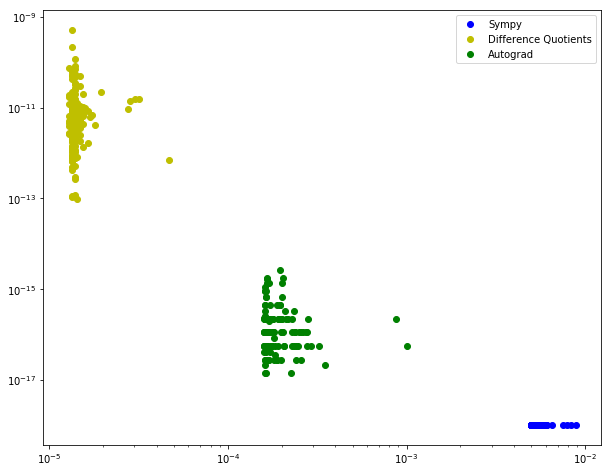

In [7]:
def Timer(N):
    Time1=np.zeros(N,dtype='float')
    Time2=np.zeros(N,dtype='float')
    Time3=np.zeros(N,dtype='float')
    Error1=1e-18*np.ones(N,dtype='float')
    Error2=np.zeros(N,dtype='float')
    Error3=np.zeros(N,dtype='float')
    g = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
    dg = grad(g)
    for i in range(N):
        x = np.random.uniform(low=-np.pi, high=np.pi)
        time11 = time.clock()
        result1 = f_prime(x)
        time12 = time.clock()
        Time1[i] = time12-time11
        time21 = time.clock()
        result2 = centered4(x)
        time22 = time.clock()
        Time2[i] = time22-time21
        Error2[i] = abs(result2-result1)
        time31 = time.clock()
        result3 = dg(x)
        time32 = time.clock()
        Time3[i] = time32-time31
        Error3[i] = abs(result3-result1)
    return Time1,Time2,Time3,Error1,Error2,Error3
Time1,Time2,Time3,Error1,Error2,Error3 = Timer(200)
ax5 = plt.figure(figsize=(10,8)).gca()
ax5.loglog(Time1,Error1,'ro',label='Sympy',color='b')
ax5.loglog(Time2,Error2,'ro',label='Difference Quotients',color='y')
ax5.loglog(Time3,Error3,'ro',label='Autograd',color='g')
ax5.legend()